In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import (t, norm)

# ___Testing a Population Mean Difference___
---------------

In [7]:
# We'll be looking at paired data, where we'll have a set of features and records for each feature for both the columns (or variables)

cpw = pd.read_csv("./../data/children_per_woman_total_fertility.csv")
cpw.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0                 Aruba  5.64  5.64  5.64  5.64  5.64  5.64  5.64  5.64  5.64   
1           Afghanistan  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
2                Angola  6.93  6.93  6.93  6.93  6.93  6.93  6.93  6.94  6.94   
3               Albania  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
4  Netherlands Antilles  5.80  5.80  5.80  5.80  5.80  5.80  5.80  5.80  5.80   

   ...  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  ...  1.82  1.82  1.82  1.82  1.82  1.82  1.82  1.82  1.83  1.83  
1  ...  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  
2  ...  2.54  2.52  2.50  2.48  2.47  2.45  2.43  2.42  2.40  2.40  
3  ...  1.78  1.78  1.78  1.79  1.79  1.79  1.79  1.79  1.79  1.79  
4  ...  2.00  2.00  2.01  2.01  2.01  2.01  2.01  2.02  2.02  2.02  

[5 rows x 302 columns]

In [14]:
np.where(cpw.country == "Pakistan")

(array([140], dtype=int64),)

In [19]:
afghanistan = cpw.iloc[1, 1:]
pakistan = cpw.iloc[140, 1:]

In [22]:
# The data we are interested in is the average number of children per women in Pakistan and Afghanistan over the 300 years window of 1800 - 2100
# Some of them may be predicted data :&(

afghanistan.mean(), pakistan.mean()

(5.7414285714285755, 5.189036544850493)

In [23]:
afghanistan.mean() - pakistan.mean()

0.5523920265780822

In [25]:
# We have the average number of children per women data for each year, starting from 1800 to 2100.

(afghanistan - pakistan).mean()

0.5523920265780723

In [35]:
# We have two samples of 300 size,
# We'll define the difference as Afghanistan - Pakistan.

# The question here is that is there a significant difference between the average number of children per women between the two countries?
# In other words;

# @ 5% significance level;

# Null hypothesis: There's no significant difference between the average number of children per women between the two countries.
# Alternative hypothesis: There's a significant difference between the average number of children per women between the two countries. (two tailed)

## ___$H_0: \bar{CPW_{Afg}} - \bar{CPW_{Pak}} = 0$___
## ___$H_1: \bar{CPW_{Afg}} - \bar{CPW_{Pak}} \neq 0$___

In [32]:
# We have records for only 300 years.
# We have to use them to estimate the population mean difference!

# Our best estimate is the difference between the sample means! (or the mean of year-wise differences in the sample)

best_est = (afghanistan - pakistan).mean()
best_est

0.5523920265780723

In [64]:
# Test score = (best estimate - hypothesized estimate) / standard error
# Since we do not know the population's standard error, we'll calculate the samples' difference's standard error,

stderr = (afghanistan - pakistan).std() / np.sqrt(afghanistan.size)    # afghanistan.size = pakistan.size, so we could use either one of them.
stderr

0.03683155481555702

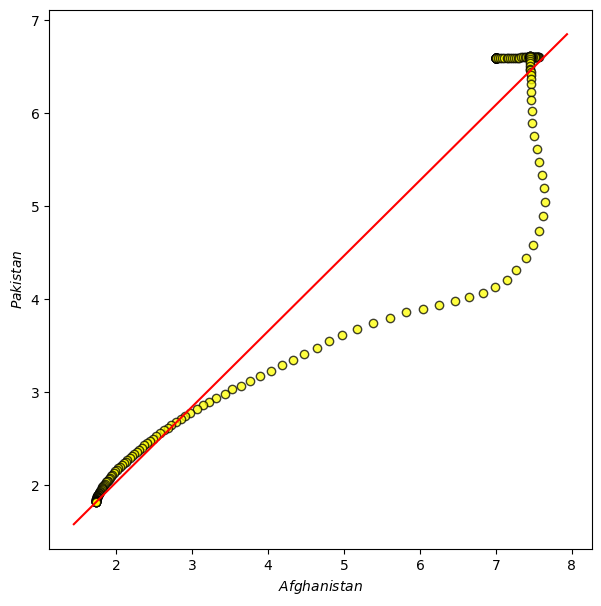

In [65]:
# To see the differences in a scatter plot,

fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.scatter(afghanistan, pakistan, color = "yellow", edgecolor = "black", alpha = 0.75)
axes.plot(axes.get_xbound(), axes.get_ybound(), color = "red")
axes.set_xlabel("$Afghanistan$")
axes.set_ylabel("$Pakistan$")
plt.show()

In [45]:
# Assumptions: 

# 1) Our samples are simple random samples.
# 2) Samples are large enough.

In [66]:
# Is our sample of differences normally distributed?

x = np.linspace(0, 1, num = 50, endpoint = True)
qnorm = norm.ppf(x)
qtest = np.quantile(a = afghanistan - pakistan, q = x)

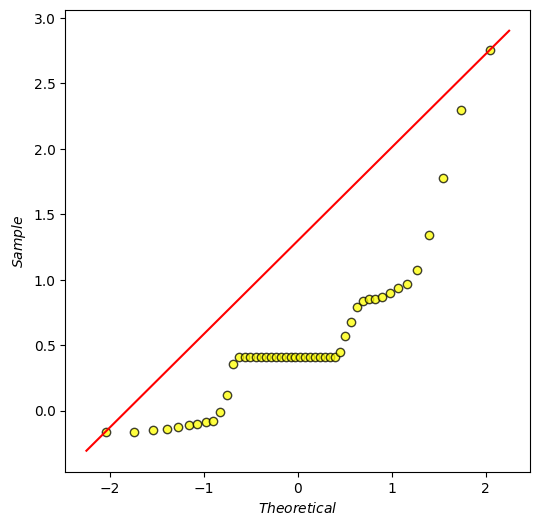

In [67]:
fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.scatter(qnorm, qtest, color = "yellow", edgecolor = "black", alpha = 0.75)
axes.plot(axes.get_xbound(), axes.get_ybound(), color = "red")
axes.set_xlabel("$Theoretical$")
axes.set_ylabel("$Sample$")
plt.show()

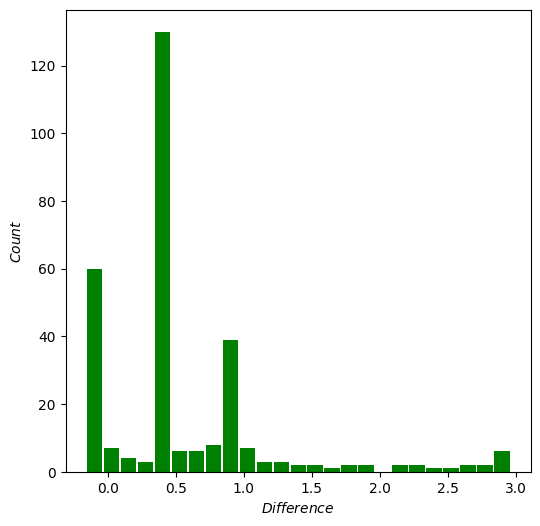

In [63]:
# The distribution is NOT NORMAL AT ALL.

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.hist(afghanistan - pakistan, bins = 25, color = "green", rwidth = 0.9)
axes.set_xlabel("$Difference$")
axes.set_ylabel("$Count$")
plt.show()

In [71]:
diff = afghanistan - pakistan

diff.min(), diff.max(), diff.median(), diff.mean(), diff.std()

(-0.16000000000000014,
 2.96,
 0.41000000000000014,
 0.5523920265780723,
 0.6390035934715437)

In [73]:
# Test statistic

tscore = (best_est - 0) / stderr
tscore

14.997792771559872

In [97]:
# The probability of a random normal value being less than or equal to the given t score is;

t.cdf(tscore, df = diff.size - 1)

1.0

In [99]:
t.pdf(tscore, df = diff.size - 1)

1.075388999903385e-37

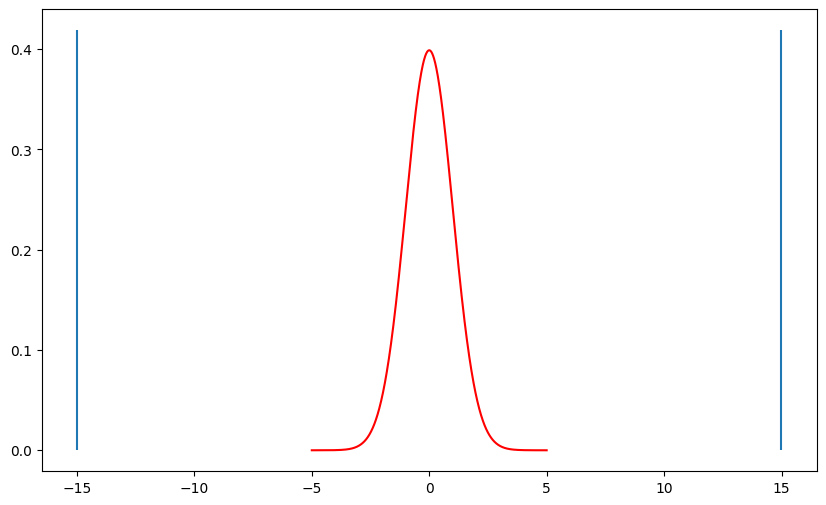

In [123]:
x = np.linspace(start = -5, stop = 5, num = 1000, endpoint = True)
tvals = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
fig.set_size_inches(10, 6)
axes.plot(x, tvals, color = "red")
axes.vlines(x = [-tscore, tscore], ymin = 0, ymax = max(axes.get_ybound()))
axes.fill_between(x = x, y1 = 0, y2 = max(axes.get_ybound()), where = (x > tscore) & (x < -tscore),
                   color = "yellow", alpha = 0.75, interpolate = True)
plt.show()